In [362]:
import pandas
import px4tools
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = (10,10)
pl.rcParams['lines.linewidth'] = 3
pl.rcParams['font.size'] = 15

In [363]:
data = px4tools.project_lat_lon(px4tools.process_data(pandas.read_csv('logs/15-10-28-01_59_47.csv')));

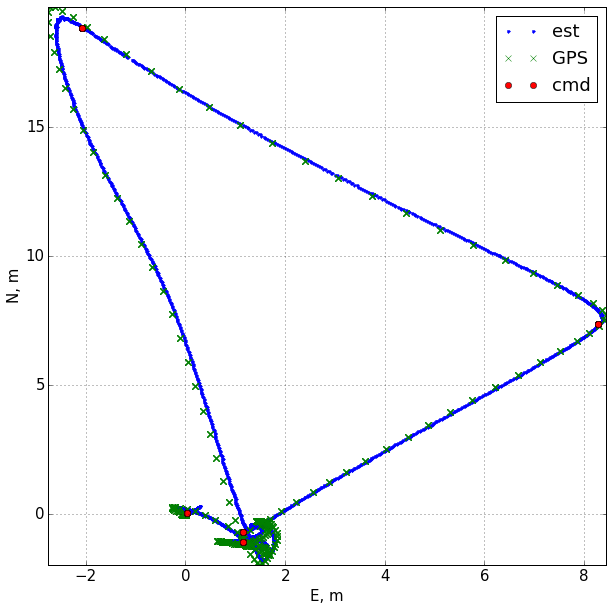

In [364]:
px4tools.pos_analysis(data);

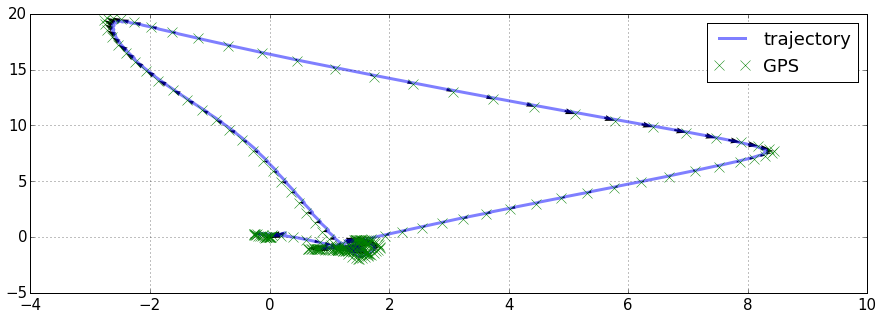

In [361]:
#pl.quiver()
gps_x = px4tools.new_sample(data.GPS_X)
gps_y = px4tools.new_sample(data.GPS_Y)
p_x = px4tools.new_sample(data.LPOS_X)
p_y = px4tools.new_sample(data.LPOS_Y)
pl.plot(p_y, p_x, label='trajectory', alpha=0.5)
pl.plot(gps_y, gps_x, 'x', label='GPS', markersize=10)
pl.quiver(p_y, p_x, gps_y - p_y, gps_x - p_x, scale_units='xy', scale=1, units='xy', angles='xy', label='$\Delta$')
pl.legend()

pl.grid()
#pl.legend(loc='best')

In [350]:
def find_delay(data1, data2, range=pl.arange(-30,30), plot=False, *args, **kwargs):
    dt = pl.mean(pl.diff(pl.array(data1.index)))
    delay_fit = []
    delay_array = pl.arange(0,30)
    for i in delay_array:
        dx = data1 - data2.shift(i)
        delay_fit += [pl.sum( pl.absolute(dx[pl.isfinite(dx)]))]
    delay_fit = pl.array(delay_fit)
    delay_fit = delay_fit - delay_fit.min()
    delay_fit = delay_fit / delay_fit.max()
    i_min = pl.argmin(delay_fit)
    if plot:
        pl.plot(dt*delay_array, delay_fit, *args, **kwargs)
    #print i_min, dt
    return i_min*dt

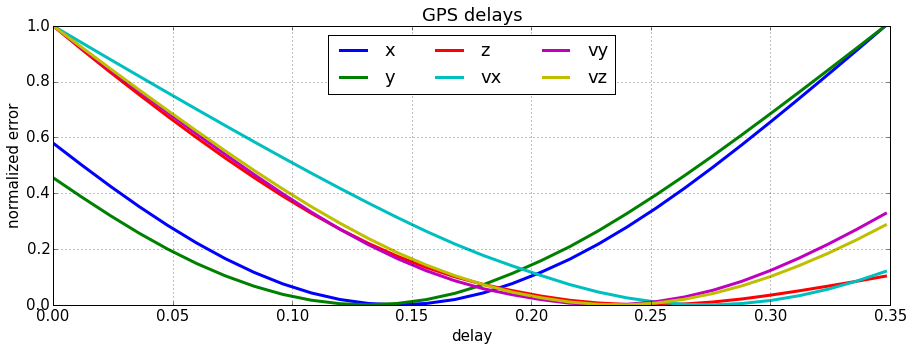

In [354]:
find_delay(data.GPS_X, data.LPOS_X, plot=True, label='x')
find_delay(data.GPS_Y, data.LPOS_Y, plot=True, label='y')
find_delay(data.GPS_Z, -data.LPOS_Z, plot=True, label='z')
find_delay(data.GPS_VelN, data.LPOS_VX, plot=True, label='vx')
find_delay(data.GPS_VelE, data.LPOS_VY, plot=True, label='vy')
find_delay(data.GPS_VelD, data.LPOS_VZ, plot=True, label='vz')
pl.grid()
pl.legend(loc='best', ncol=3)
pl.ylabel('normalized error')
pl.xlabel('delay')
pl.title('GPS delays')

In [285]:
x_gps = data[['GPS_X', 'GPS_Y', 'GPS_Z', 'GPS_VelN', 'GPS_VelE', 'GPS_VelD']]
x = data[['LPOS_X', 'LPOS_Y', 'LPOS_Z', 'LPOS_VX', 'LPOS_VY', 'LPOS_VZ']]
dx = x - x_gps

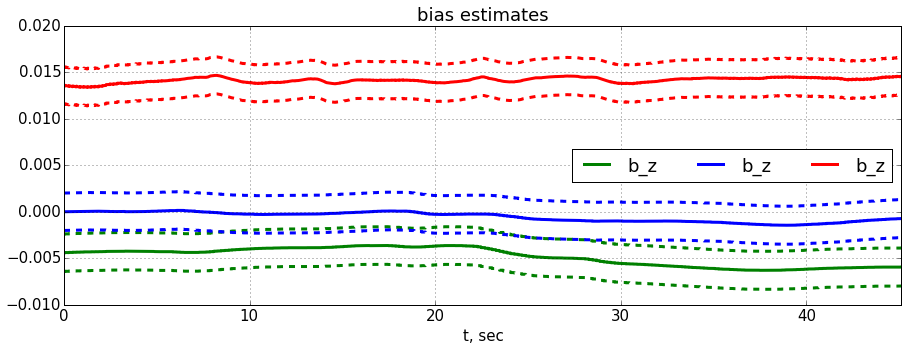

In [266]:
(data.EST0_s6 + pl.sqrt(data.EST2_P6)).plot(label='', color='g', style='--')
(data.EST0_s6 - pl.sqrt(data.EST2_P6)).plot(label='', color='g', style='--')
(data.EST0_s6).plot(label='b_z', color='g')

(data.EST0_s7 + pl.sqrt(data.EST2_P7)).plot(label='', color='b', style='--')
(data.EST0_s7 - pl.sqrt(data.EST2_P7)).plot(label='', color='b', style='--')
(data.EST0_s7).plot(label='b_z', color='b')

(data.EST0_s8 + pl.sqrt(data.EST2_P8)).plot(label='', color='r', style='--')
(data.EST0_s8 - pl.sqrt(data.EST2_P8)).plot(label='', color='r', style='--')
(data.EST0_s8).plot(label='b_z', color='r')

pl.legend(loc='best', ncol=3)
pl.title('bias estimates')
pl.grid()

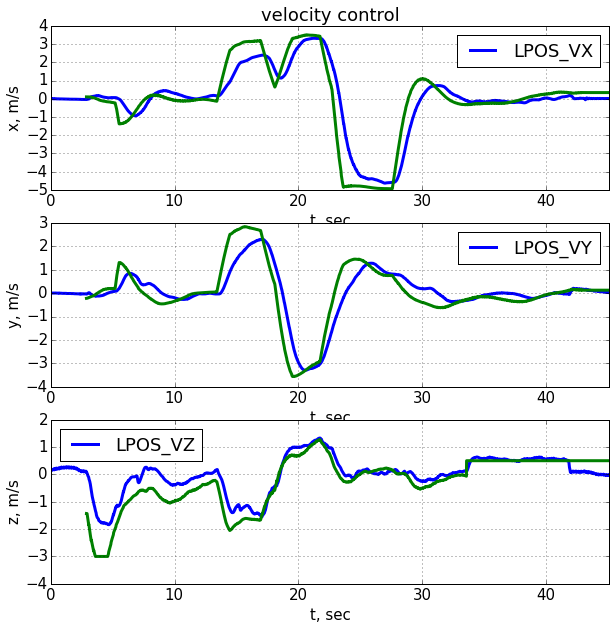

In [365]:
px4tools.plot_velocity_loops(data)